In [25]:
from clipppy import load_config

# these are just for plotting
import numpy as np
import corner
from matplotlib import pyplot as plt
import torch

In [26]:
config = load_config('config_fit_lens.yaml')

In [27]:
config.conditioning

{'obs': tensor([[0.0446, 0.0453, 0.0460,  ..., 0.0919, 0.0907, 0.0895],
         [0.0452, 0.0459, 0.0466,  ..., 0.0934, 0.0922, 0.0909],
         [0.0459, 0.0466, 0.0473,  ..., 0.0949, 0.0937, 0.0924],
         ...,
         [0.0573, 0.0582, 0.0591,  ..., 0.1222, 0.1204, 0.1187],
         [0.0565, 0.0574, 0.0583,  ..., 0.1203, 0.1186, 0.1169],
         [0.0558, 0.0566, 0.0576,  ..., 0.1184, 0.1168, 0.1151]])}

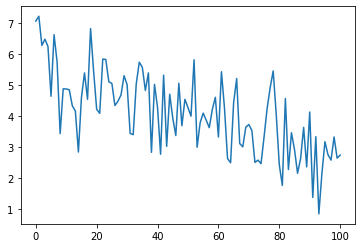

In [17]:
plt.plot( config.conditioning['obs'] )

In [3]:
config = load_config('linear.yaml')
x = config._model.stochastic_specs['x']
y = config.conditioning['obs']
err = config._model.stochastic_specs['err']
losses = config.fit(lr=1e-2, n_steps=1000)

plt.plot(losses)

TypeError: 'StochasticSpecs' object is not subscriptable

In [28]:
config._model()

tensor([14.7716, 14.0588, 14.1697, 14.7501, 14.3714, 12.7215, 14.2750, 12.2511,
        13.8391, 13.0757, 14.8567, 14.8745, 14.8746, 12.9452, 14.2540, 13.9326,
        13.3737, 14.6775, 13.1042, 12.8985, 13.6726, 13.7453, 12.3266, 13.9879,
        12.6680, 14.0538, 11.6365, 11.9120, 13.0189, 12.2881, 13.2094, 12.8574,
        14.0534, 13.3339, 11.8184, 13.2950, 11.6475, 13.3002, 13.4925, 12.1539,
        11.2033, 13.2100, 11.8957, 13.6290, 12.0600, 14.0291,  9.9148, 12.9757,
        12.9846, 12.7345, 10.6567, 11.0850, 11.2188, 11.0210, 11.4033, 10.5654,
        10.4364, 10.0016, 10.2130, 12.1348, 11.3226, 11.1653, 10.1786, 12.6052,
        12.4455, 10.3150, 11.0429, 10.5229, 12.1329, 10.9915, 11.9225, 11.8998,
        11.9856, 10.8313, 10.2606,  8.9662, 12.8421, 12.1322,  9.6845, 11.1616,
        10.5114,  9.4298, 10.7789, 12.3800,  9.4836, 11.9010,  8.7850,  9.6504,
        10.6116,  8.4300,  9.4490,  9.8672,  8.4384,  9.1661, 10.4192,  8.6661,
        11.4149,  8.9156,  8.6551,  8.78

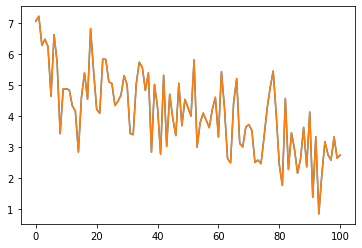

In [16]:
plt.plot( config.model() )
plt.plot( torch.load('linear_data.pt') )

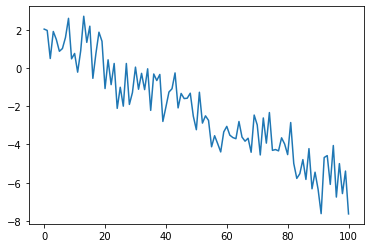

In [24]:
plt.plot( config._model() )

In [3]:
ppd = config.ppd(plate_stack=[1000])

param_names = ('a', 'b')

post_samples = {key: ppd['guide_trace'].nodes[key]['value'].detach().numpy()
                for key in param_names}
y_pred = ppd['model_trace'].nodes['y']['value']

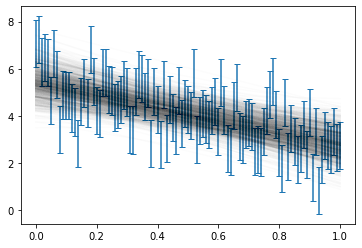

In [4]:
plt.errorbar(x, y, err, ls='none', capsize=3)
plt.plot(x, y_pred.T, 'k-', alpha=0.01);

/home/eliasd/.pyenv/versions/3.9.7/envs/lens-3.9.7/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


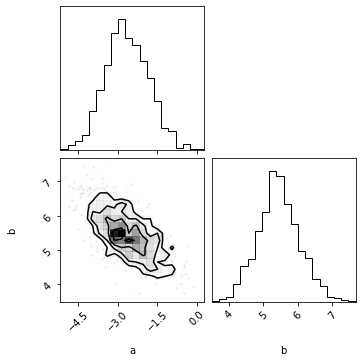

In [5]:
corner.corner(np.stack(post_samples.values(), -1), labels=param_names);